<a href="https://colab.research.google.com/github/gulabpatel/Speech-to-Text/blob/main/07_1_speaker_diarization_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rich transcription with OpenAI [Whisper](https://github.com/openai/whisper/) and [pyannote.audio](https://github.com/pyannote/pyannote-audio)

## Installation

In [ ]:
# speechbrain (used for speaker embedding)
!pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
!pip install -qq speechbrain==0.5.12

# pyannote.audio (used for speaker diarization)
!pip install -qq pyannote.audio==2.1.1

# OpenAI whisper (used for automatic speech recognition)
!pip install -qq git+https://github.com/openai/whisper.git

## File upload

In [ ]:
# upload an audio file (might not work for large files)
import google.colab
audio_file = list(google.colab.files.upload())[0]

## Speaker diarization

* Visit [hf.co/pyannote/speaker-diarization](https://hf.co/pyannote/speaker-diarization) and accept user conditions
* Visit [hf.co/pyannote/segmentation](https://hf.co/pyannote/segmentation) and accept user conditions


In [ ]:
# log in on Huggingface hub (where pretrained pyannote models are hosted)
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# load pyannote.audio speaker diarization
from pyannote.audio import Pipeline
speaker_diarization = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1",
                                               use_auth_token=True)

In [ ]:
# apply speaker diarization
who_speaks_when = speaker_diarization(audio_file,
                                      num_speakers=None,  # these values can be
                                      min_speakers=None,  # provided by the user
                                      max_speakers=None)  # when they are known

In [ ]:
# reset notebook visualization (including start time, end time and speaker colors)
from pyannote.core import notebook
notebook.reset()

# uncomment line below to only visualize the first minute of the file
#from pyannote.core import Segment
#notebook.crop = Segment(0, 60)

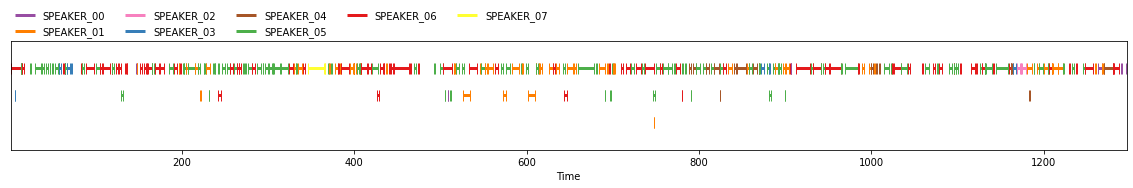

In [ ]:
who_speaks_when

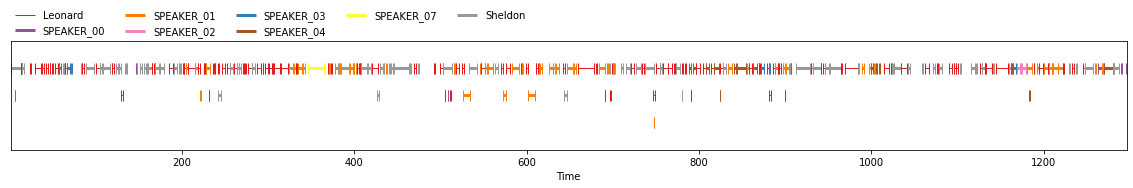

In [ ]:
# rename speakers if you know their name
who_speaks_when = who_speaks_when.rename_labels({"SPEAKER_06": "Sheldon", "SPEAKER_05": "Leonard"})
who_speaks_when

## Transcription

In [ ]:
# load OpenAI Whisper automatic speech transcription
import whisper

# choose among "tiny", "base", "small", "medium", "large"
# see https://github.com/openai/whisper/
model = whisper.load_model("small")

In [ ]:
# transcribing first minute
from pyannote.core import Segment
first_minute = Segment(0, 60)

from pyannote.audio import Audio
audio = Audio(sample_rate=16000, mono=True)

for segment, _, speaker in who_speaks_when.crop(first_minute).itertracks(yield_label=True):
    waveform, sample_rate = audio.crop(audio_file, segment)
    text = model.transcribe(waveform.squeeze().numpy())["text"]
    print(f"{segment.start:06.1f}s {segment.end:06.1f}s {speaker}: {text}")

0001.4s 0012.9s Sheldon:  So if a photon is directed through a plane with two slits in it and either slip is observed, it will not go through both slits. If it's unobserved, it will. However, if it's observed after it's left the plane but before it hits its target, it will not have gone through both slits.
0006.7s 0006.7s SPEAKER_03: 
0012.9s 0013.4s Leonard:  Agreed.
0014.0s 0014.5s Leonard:  What's your point?
0014.5s 0017.1s Sheldon:  There's no point. I just think it's a good idea for a t-shirt.
0023.5s 0024.8s Leonard:  Excuse me. We are on weather alert.
0029.2s 0036.8s Leonard:  One across is a G in, eight down is Novikov, 26 across is MCM, 14 down is, I'm your finger.
0037.9s 0040.3s Leonard:  which makes 14 across pot of prints.
0042.0s 0045.0s Leonard:  C, Popa Docs, Capital Idea. So that's Port-au-Prince.
0046.5s 0047.0s Leonard:  Hey, Eddie.
0048.9s 0050.3s Leonard:  Can I help you? Yes!
0052.5s 0056.1s Leonard:  Is this the high IQ Spombank?
0057.8s 0057.9s Leonard:  So, t

## Local installation (based on conda)

```bash
conda create -n rich_transcription python=3.9
conda activate rich_transcription

# speechbrain (used for speaker embedding)
pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
pip install -qq speechbrain==0.5.12

# pyannote.audio (used for speaker diarization)
pip install -qq pyannote.audio==2.1.1

# OpenAI whisper (used for automatic speech recognition)
pip install -qq git+https://github.com/openai/whisper.git
```